# Theoretical background

## Support Vector Machine

Support Vector Machine operates by separation, classifying records in a binary form using a linear object that divides two particular classes of observations.  
With $ x^{(i)} $ i $-$ th observation, $ y^{(i)} = \pm 1 $ observation's label and $w$ array of weights, it's possible to define the optimal margin:  
  
\begin{equation}
\gamma = \min_{i} \frac{y^{(i)}(w^{T}x^{(i)})}{\|w\|}
\end{equation}

such that:
\begin{equation}
 y^{(i)}(w^{T}x^{(i)}) \ge 1 \; \forall \; i
\end{equation}


this quantity represents the minimum Euclidean distance between points $ x^{(i)} $ and the hyperplane defined by the vector $ w $. In order for the points to be correctly classified by such a linear object, constraints with margin, called hard margin, equal to one are introduced.

A cost function that we can choose to minimize in order to perform a classification according to the oprimal margin is the Squared hinge loss function:  
\begin{equation}
L(w,x^{(i)}) = \frac{1}{2} \|w\|^{2} + \frac{C}{N}\sum_{i}^{N} \left( \max(0, 1 - y^{(i)}(w^{T}\cdot x^{(i)}))^{2} \right ) 
\end{equation}
In this one, in addition to the term characterized by the function $ \max $ which implies the minimization of the function with the correct classification of the observations, the term $ \|w\| $ is included in order to apply the regularization and minimize the values of the parameters $ w $ to counteract the phenomenon of overfitting..  

In the case in which the dataset was not linearly separable one can replace the margin introduced in the constraints (2), defined "hard margin", with the "soft margin", a more permissive margin that allows to penalize in a lesser way the incorrect classification in phase of training. This tolerance is determined inside the function of cost from the hyperparameter $ c $. 

To deal with cases where non-linear objects are needed, the SVM method can be enriched, thanks to the "Representer theorem" and "Mercer's Theorem", with what is called the "Kernel Trick". With this implementation the SVM method can very effectively project the observations in higher dimensional spaces and search in these dimensions for linear objects able to separate the observations. 

For simplicity we consider a linearly separable dataset with which we fall back to a binary classification problem.

## Gradient Descent


When studying the directional derivatives of a differentiable function, it can be shown through Schwarz's inequality that: 
\begin{equation}
\frac{\partial f}{\partial r}(x_{0}) \le |\nabla f(x_{0})| 
\end{equation}
$ \forall $ $ r $ verse.

That is, the direction that makes the directional derivative maximum is that of the gradient. 
Because of this result, it is possible to minimize a function iteratively. You calculate the gradient of the function at a particular point and move with a certain step in the opposite direction. This is the principle behind the method called Gradient Descent.

Formally we have that, for $N$ observations, we compute the displacement to be made in order to minimize some cost function $L(w)$ as:

\begin{equation}
w^{(t+1)} = w^{(t)} - \eta \nabla_{w} L(w,x) 
\end{equation}

When in such a form we speak of "Batch Gradient Descent", the use of all points for each iteration cycle makes this method very stable in convergence but, on the other hand, with numerous observations it requires considerable computational effort. Fundamental to a good convergence of the method are the parameter $\eta$, called "learning rate" and the starting point of the values of the vector $w$.  

In cases where the number of observations is such that a batch approach is complicated, one can use the "Mini-Batch Gradient Descent" method in which for each calculation of the descent step only a certain number of observations are used at a time. In this way the computational burden is lightened but there may be a convergence towards a less stable minimum point. A limiting case of the "Mini-Batch" method is the "Stochastic Gradient Descent" method in which a single point at a time is used to calculate the gradient and, consequently, the displacement. The latter is widely used within the "Deep Learning" in a particular structure called "Adam" with which we try to stabilize the search for the minimum rescaling the gradient step by step, so as to have a stable convergence but without overburdening the computational process.  

## SVM e Gradient Descent


In order to minimize the quadratic hinge loss function, it is necessary to compute the gradient at the general point $(w,x)$. Since the function $\max$ is present it is necessary to consider the derivative defined by cases:

\begin{equation}
\nabla_{w}L(w,x) = \begin{cases} w\; se\;\; 1 - y(w^{T}\cdot x) \ge 0\\
                                 w + 2 \left( 1 - y(w^{T}\cdot x) \right ) yx \; se\;\; 1 - y^{(i)}(w^{T}\cdot x^{(i)}) < 0
\\  \end{cases}
\end{equation}

with this derivative it is possible to find a minimum of the cost function with the gradient descent method. With N points for the calculation of the displacement of the vector $w$ it is necessary to consider the learning rate, the summation over the number of observations considered and the factor $\frac{1}{N}$ present in the cost function (3). 

## Simulated Annealing

There are different approaches of function minimization that require a less formal approach from the theoretical point of view that are called metaheuristics.

A particular metaheuristic is the "simulated annealing". With this one tries to minimize the function starting randomly from a starting point and updating it according to the value of the cost function. Once proposed a displacement of this point comes carried out one appraisal of the cost: if inferior then the displacement is carried out, otherwise the displacement assumes a probabilistic nature mediated from one temperature that tends to diminish with to pass of the iterations, rendering less and less probable the displacement towards unfavorable points and tending therefore to one convergence.

For temperature we choose a trend inversely proportional to the number of iterations $(t)$:
\begin{equation}
T^{(t+1)} = \frac{T^{(t)}}{1 + t}
\end{equation}  
The probability of switching to a solution such that the cost increases is mediated by the Metropolis criterion whereby:
\begin{equation}
P = \exp \left( -\frac{f(x_{new})- f(x_{old})}{T} \right)
\end{equation}  


# Implementation with Python

The Numpy library available for Python contains functions that allow a very efficient and simple handling of the vector operations needed to implement the gradient descent method.

## Required libraries

In [1]:
import pandas as pd 
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
import seaborn as sns
from IPython import display
from mlxtend.plotting import plot_decision_regions

## Class definition and methods for SVM

The goal is to build a SVM class with which to have objects able to contain datasets and to adapt to them with a training phase and to classify them correctly with support vector machine. 

In [2]:
'''author: Daniele Rizzo'''



class svm():
    
    def __init__(self, x, y, w = None):
        
        '''
        Parameters
        ------------------------
        x: Either Pandas DataFrame or 2D Numpy Array.
           Features, vector of ones for the intercept is automatically inserted. 
        y: Either Pandas DataFrame or 1D Numpy Array.
           Target array. 
        w: list or Numpy array.
           Initial weights, by default are randomly assigned. 
        ------------------------
        
        '''
        
        
        if (str(type(x)) == "<class 'pandas.core.frame.DataFrame'>"):
            x = x.to_numpy()
            self.x = np.hstack( (np.ones((x.shape[0], 1)), x ) )
        else:
            self.x = np.hstack( (np.ones((x.shape[0], 1)), x ) )
        
        
        if (str(type(y)) == "<class 'pandas.core.series.Series'>"):
            y = y.to_numpy()
            self.y = y
        else:
            self.y = y
        
        
        if (w is None):
            self.w = np.random.uniform(-3, 3, size=(self.x.shape[1]))
        else:
            if (len(w) != self.x.shape[1]):
                raise AttributeError (f"Length of array is {len(w)} Length {self.x.shape[1]} is required.")
                
            else:
                self.w = w
        
        
####################################################################
################ Pretty print for attributes #######################
####################################################################                
        
    def pprint(self):
        print("Parameters: ")
        print(self.x[:5,:])
        print("------" * len(self.w))
        print("Target values: ")
        print(self.y[:5])
        print("------" * len(self.w))
        print("Weights: ")
        print(self.w)

        
####################################################################
################ Gradient descent ##################################
####################################################################                

                
    def gradient_descent(self, nint = 1000, eta = 0.01, tol = 1, c = 1, 
                         plot = True, stop = None, batch_size = None):
      
        '''       
        Method to fit the model through gradient descent. 
        With attribute "live" it s possible to plot the descent of cost 
        or norm of gradient increment in real time.
        
        ------------------------
        Parameters
        ------------------------
        nint: int, default = 1000
              Number of epochs.
              
        eta: float, default = 0.01
             Learning rate.
             
        c: float, default = 1
           Coefficient for regularization.   
           
        tol: float, default = 1
           Coefficient for margin.
           
        plot: str/bool, equals to "cost", "norm" or bool. default = True
              Flag to show or not the "live" trend of the cost function
              or the L2 norm of the gradient increment dw during the learning.
              Bool to show, or not, static plot.
              
        stop: float, default = None
           Threshold to stop the iteration of gradient descent.
           
        batch_size: int, default = None
                    Size of the batch for nano and stochastic gradient descent.
                    If equals to None, batch gradient descent will be used.
        ------------------------
       
       '''    
        if batch_size != None:
            size = self.x.shape[0]//batch_size
        else:
            size = 1
        norm = np.zeros((nint, size))
        cost = np.zeros((nint, size))
        stop = 0
        

        for i in range(nint): 
            
            if batch_size == None:
                index = np.random.choice(self.x.shape[0], [1,self.x.shape[0]], replace = False)
            else:
                index = np.random.choice(self.x.shape[0], [size, batch_size], replace = False)
            j = 0
            
            for idx in index:
                distance = 1 - self.y * np.dot(self.x, self.w)
                distance[distance < 0] = 0
                mask = distance > 0
            
                dw = (c * self.w)  - (tol * (1./len(idx)) * 2 * np.dot(distance[idx] * self.y[idx], self.x[idx,:]))
                self.w = self.w - (eta * dw)
                norm[i,j] = np.linalg.norm(dw)
                cost[i,j] = (c * 0.5 * (np.linalg.norm(self.w))**2) + (tol * (1./len(idx)) * sum(distance**2))


                if (stop != None):
                    if (norm[i,j] < stop):
                        print("Stopping criteria invoked!")
                        stop = 1
                        print(f"Iteration number {s}")
                        break
                j += 1
            if (stop == 1):
                break
            
            
################ Visualization #####################################
                
        
        ### Plot of L2 norm of dw ###
        if (plot == "norm"):
            for j in range(nint):
                
                plt.plot(norm)
                
                display.clear_output(wait=True)
                plt.grid()
                    
                plt.ylim(0, 1.3*max(norm))
                plt.xlim(-1,j+1)
                
                plt.show()

            return self.w
                          
        ### Plot of cost function ###
        if (plot == "cost"):
            for j in range(nint):
                plt.plot(cost)
                
                display.clear_output(wait=True)
                plt.grid()
                    
                plt.ylim(0, 1.3*max(cost))
                plt.xlim(-1,j+1)
                
                plt.show()
                
            return self.w
                                
        if plot == True:
            plt.subplot(211)
            plt.title("Cost on each iteration")
            plt.plot(cost.reshape(-1))
            plt.show()
            
            plt.subplot(212)
            plt.title("Norm of dw on each iteration")
            plt.plot(norm.reshape(-1))
            plt.show()

            return self.w
        
        else:
            return self.w
        

####################################################################        
################ Prediction ########################################
####################################################################
   
    def predict(self, X, Y = None, accuracy = False, output = True):
        
        '''
        Method to predict class and get accuracy of the fitted SVM modedl.
        
        ------------------------
        Parameters
        ------------------------
        X: 2D Numpy Array.
           Features of the record to predict.
        Y: 1D Numpy Array.
           Array with the true target values to get accuracy.
        accuracy: bool.
           Flag to get accuracy in output.
        output: bool.
           Flag to get or not the dataframe with predictions and real target values
        '''
        
        predictions = []
        X = np.hstack( (np.ones((X.shape[0], 1)), X ) )
        predictions = np.sign(np.inner(X,self.w))

        
        if (accuracy == True):
            acc = 0.
            for i,j in zip(predictions, Y):
                if i == j:
                    acc += 1.
            print('Accuracy: ', acc/len(predictions) )
                
        if output:
            return pd.DataFrame({"prediction" : predictions, "test" : Y})
        else:
            return None
                    


## Class and methods definition for simulated annealing

In [3]:
class meta():
    
    def __init__(self, x, y, w = None):
        
        '''
        Parameters
        ------------------------
        x: Either Pandas DataFrame or 2D Numpy Array.
           Features, vector of ones for the intercept is automatically inserted. 
        y: Either Pandas DataFrame or 1D Numpy Array.
           Target array. 
        w: list or Numpy array.
           Initial weights, by default are randomly assigned. 
        ------------------------
        
        '''
        
        
        if ( str(type(x)) == "<class 'pandas.core.frame.DataFrame'>"):
            x = x.to_numpy()
            self.x = np.hstack( (np.ones((x.shape[0], 1)), x ) )
        else:
            self.x = np.hstack( (np.ones((x.shape[0], 1)), x ) )
        
        
        if ( str(type(y)) == "<class 'pandas.core.series.Series'>"):
            y = y.to_numpy()
            self.y = y
        else:
            self.y = y
        
        
        if (w == None):
            self.w = np.random.uniform(-3, 3, size=(self.x.shape[1]))
        else:
            if (len(w) != self.x.shape[1]):
                raise AttributeError (f"Length of array is {len(w)} Length {self.x.shape[1]} is required.")
                
            else:
                self.w = w
    
    
    
    
    
    
    def distance(self, w = None):
        if (w is None):
            return 1 - self.y * np.dot(self.x, self.w)
        else:
            return 1 - self.y * np.dot(self.x, w)
    
    
    
    def cost(self, w = None):
        if (w is None):
            distance = self.distance()
            return (1./self.y.shape[0]) * sum(distance[distance > 0]**2) + 0.5*np.linalg.norm(self.w)**2
        else:
            distance = self.distance(w)
            return (1./self.y.shape[0]) * sum(distance[distance > 0]**2) + 0.5*np.linalg.norm(w)**2
    
    
    
    def sim_ann(self, T = 35, nint = 200, eta = 0.05, plot = True, bound = [-3,3]):
        best_sol, best_cost = self.w, self.cost()
        cost = np.zeros(nint)
       
        for i in range(nint):
            tmp = T/float(i + 1)
        
            new_sol = best_sol + eta * np.random.uniform(bound[0], bound[1], size=(self.x.shape[1]))
            new_cost = self.cost(new_sol)
            
            diff = new_cost - best_cost
            metropolis = np.exp(-diff/tmp)    
            
            rand = np.random.rand()
            
            if (diff < 0 or rand < metropolis):
                best_sol = new_sol
                best_cost = new_cost
                
            else:
                continue
            cost[i] = best_cost
        
        if plot:
            plt.title("Cost")
            plt.plot(cost)
            
        self.w = best_sol
                
        return {"Solution":best_sol, "Cost":best_cost}

# Application example

## Iris dataset

The dataset contains information on morphology given on several samples of different species of the Iris flower. Made famous by Fischer, who published in 1936 an article ("The Use of Multiple Measurements in Taxonomic Problems") concerning the possibility of classifying the different species of Iris considering a linear function dependent on the size of the flowers, is often used as a test dataset for statistical machine learning algorithms.  
The dataset contains 150 observations and 4 different attributes related to petal and sepal size. Each observation is associated with a particular species.   
To perform a classification with support vector machine we convert the species into numerical targets $\pm 1$ and limit ourselves to a binary classification, Iris-setose vs {Iris-versicolor, iris-virgin}.

In [4]:
iris = pd.read_csv("iris.csv", index_col ="Id")

In [5]:
iris.loc[iris.Species == 'Iris-setosa', "Target"] = 1
iris.loc[iris.Species != 'Iris-setosa', "Target"] = -1

In [6]:
iris.Target[:5]

Id
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: Target, dtype: float64

In [7]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
Id,,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica,-1.0
147,6.3,2.5,5.0,1.9,Iris-virginica,-1.0
148,6.5,3.0,5.2,2.0,Iris-virginica,-1.0
149,6.2,3.4,5.4,2.3,Iris-virginica,-1.0
150,5.9,3.0,5.1,1.8,Iris-virginica,-1.0


In [8]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1.0
2,4.9,3.0,1.4,0.2,Iris-setosa,1.0
3,4.7,3.2,1.3,0.2,Iris-setosa,1.0
4,4.6,3.1,1.5,0.2,Iris-setosa,1.0
5,5.0,3.6,1.4,0.2,Iris-setosa,1.0


In [9]:
x = iris[iris.columns[:4]]

In [10]:
y = iris[iris.columns[5]]

To perform a learning phase of the model and verify its goodness, a holdout validation is used. It uses the function `train_test_split` present inside the library `SKLearn` that allows to generate randomly a set `test` and one `train` with a dimension of the test set equal to a third of the complete dataset. 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.33)

In [12]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
131,7.4,2.8,6.1,1.9
27,5.0,3.4,1.6,0.4
102,5.8,2.7,5.1,1.9
42,4.5,2.3,1.3,0.3
69,6.2,2.2,4.5,1.5


In [13]:
y_train.head()

Id
131   -1.0
27     1.0
102   -1.0
42     1.0
69    -1.0
Name: Target, dtype: float64

## Batch gradient Descent

### Model construction and validation

We define the first model with random initial parameters

In [14]:
model1 = svm(x_train, y_train)

Thanks to the `pprint()` method defined for the `svm` class it is possible to have an overview of the main attributes

In [15]:
model1.pprint()

Parameters: 
[[1.  7.4 2.8 6.1 1.9]
 [1.  5.  3.4 1.6 0.4]
 [1.  5.8 2.7 5.1 1.9]
 [1.  4.5 2.3 1.3 0.3]
 [1.  6.2 2.2 4.5 1.5]]
------------------------------
Target values: 
[-1.  1. -1.  1. -1.]
------------------------------
Weights: 
[-0.93573811 -2.26134222  0.29315436  2.96315949 -0.16998134]


The training phase of `model1` is now carried out with the Batch gradient Descent method with a number of iterations $nint = 4000$ and learning rate $eta = 0.01$, by default the learning is done with regularization in order to counteract the phenomena of overfitting minimizing the norm $|w|$.

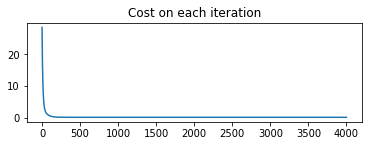

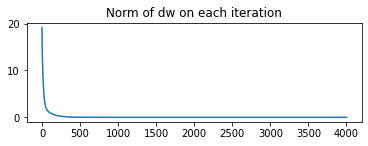

array([ 0.04634437,  0.07194583,  0.24325662, -0.38414836, -0.16705861])

In [16]:
model1.gradient_descent(nint = 4000, eta = 0.01)

It can be observed that the cost and the norm $\|w\|$ descend very quickly and beyond the five hundredth iteration no particular trends are noticeable. 

To verify the goodness of the model an evaluation of the accuracy is carried out with the method `predict`. For completeness an appraisal of the error is carried out is carried out is on the train that on the test set.

In [17]:
model1.predict(x_test, y_test, accuracy = True).head()

Accuracy:  1.0


,prediction,test
Id,,
28,1.0,1.0
71,-1.0,-1.0
149,-1.0,-1.0
52,-1.0,-1.0
20,1.0,1.0


In [18]:
model1.predict(x_train, y_train, accuracy = True).head()

Accuracy:  1.0


,prediction,test
Id,,
131,-1.0,-1.0
27,1.0,1.0
102,-1.0,-1.0
42,1.0,1.0
69,-1.0,-1.0


Given accuracy values equal to $1$ we deduce that both generalized and learning errors are zero. These results are peculiar and due to the simplicity of the problem given the particularly suitable dataset. Although the holdout method is particularly sensitive to the choice of train-test partitioning, compared to more structured methods such as iterated holdout and k-fold cross validation, it provides information about the general goodness of the model `model1`.

### Influenza del punto di inizio

A comparison is now made between model `model1` and a new model `model2` to test the impact of different initial points on the search for the optimal point 

In [19]:
dummy_weights = [5,10,7,11,1] 

In [20]:
model2 = svm(x_train, y_train, dummy_weights)

In [21]:
model2.pprint()

Parameters: 
[[1.  7.4 2.8 6.1 1.9]
 [1.  5.  3.4 1.6 0.4]
 [1.  5.8 2.7 5.1 1.9]
 [1.  4.5 2.3 1.3 0.3]
 [1.  6.2 2.2 4.5 1.5]]
------------------------------
Target values: 
[-1.  1. -1.  1. -1.]
------------------------------
Weights: 
[5, 10, 7, 11, 1]


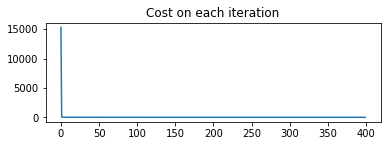

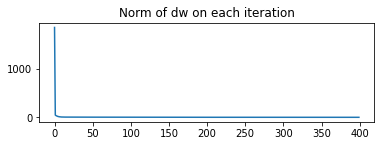

array([ 0.10073834,  0.04109818,  0.26322346, -0.35526135, -0.2050693 ])

In [22]:
model2.gradient_descent(nint = 400, eta = 0.01)

In [23]:
model2.predict(x_train, y_train, accuracy = True, output = False)

Accuracy:  1.0


In [24]:
model2.predict(x_test, y_test, accuracy = True, output = False)

Accuracy:  1.0


In [25]:
print("Model 1")
print(model1.w)
print("Model 2")
print(model2.w)

Model 1
[ 0.04634437  0.07194583  0.24325662 -0.38414836 -0.16705861]
Model 2
[ 0.10073834  0.04109818  0.26322346 -0.35526135 -0.2050693 ]


The two solutions are approximately equal and this because despite the different starting points the method `gradient descent` allows to minimize the cost function and to move close to the same optimal point. This is only one of the possible cases since in general with different starting points there is the risk of getting stuck in different local minima.

### Impatto del learning rate

In order to appreciate to the best the influence of the various learning installments they are carried out of the learning with only 100 iterations therefore to be able to observe to the best the decrease of the cost.

In [26]:
dummy_weights = [1,1,1,1,1]

An initial evaluation is performed with $\eta = 0.2$. A value that is too high, as in this case, implies a tendency to diverge rather than to tend toward a minimization of the cost function

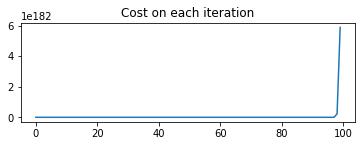

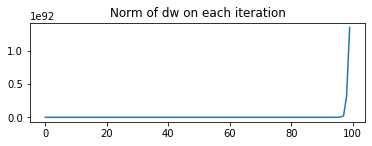

[3.56471125e+90 1.71693288e+91 1.26070980e+91 3.15343763e+90
 6.12835394e+88]
Accuracy:  0.4


In [27]:
model3 = svm(x_train, y_train, dummy_weights)
print(model3.gradient_descent(nint = 100, eta = 0.2))
model3.predict(x_test, y_test, accuracy = True, output = False)

A reduction of $\eta = 0.06$ allows for convergence of the gradient descent albeit with major swings in the cost function before stabilizing. This value, as indicated by the accuracy value, allows convergence to a point of minimum

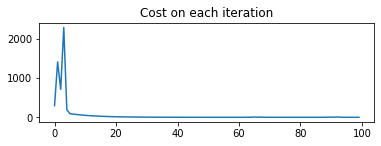

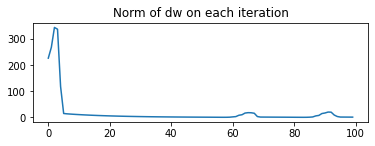

[ 0.09334694  0.12959672  0.45544766 -0.76079754 -0.34288954]
Accuracy:  1.0


In [28]:
model3 = svm(x_train, y_train, dummy_weights)
print(model3.gradient_descent(nint = 100, eta = 0.06))
model3.predict(x_test, y_test, accuracy = True, output = False)

Reducing further the value, $\eta = 0.02$ the decrease of the cost function is softer and stable without particular structures 

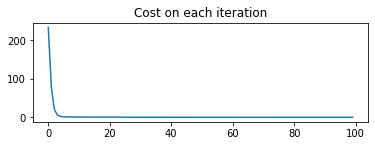

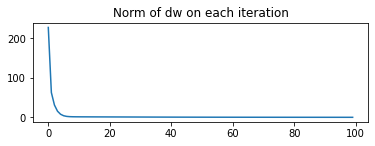

[ 0.1501919   0.02474948  0.28126226 -0.39359727 -0.08952565]
Accuracy:  1.0


In [29]:
### learning rate = 0.02 ###
model3 = svm(x_train, y_train, dummy_weights)
print(model3.gradient_descent(nint = 100, eta = 0.02))
model3.predict(x_test, y_test, accuracy = True, output = False)

An excessively low value of $eta$ can make the descent too fine and consequently a very high number of iterations would be necessary to reach a minimum point similar to that found with an optimal value of $eta$.  
It can be seen in fact that with $eta = 0.0008$ and an equal number of iterations, we obtain a considerably lower accuracy value.

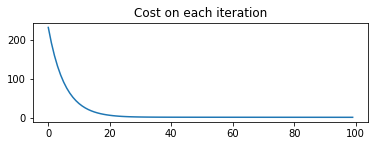

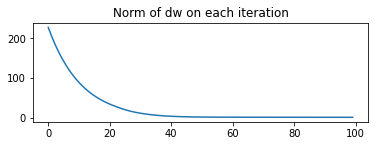

[ 0.72668692 -0.37305393  0.36652431 -0.20480217  0.52004579]
Accuracy:  0.74


In [30]:
model3 = svm(x_train, y_train, dummy_weights)
print(model3.gradient_descent(nint = 100, eta = 0.0008))
model3.predict(x_test, y_test, accuracy = True, output = False)

#### Evaluation on graphically representable problem

To further this comparison we perform the evaluation of these models on a different classification problem that allows to visualize the proposed solution. Again referring to the `iris` dataset, only the two features related to petal size are considered and new train and test sets are constructed.

In [36]:
x2 = iris[iris.columns[2:4]]

In [37]:
y2 = iris[iris.columns[5]]

In [38]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, shuffle = True, test_size = 0.33)

In [39]:
x_train2.head()

,PetalLengthCm,PetalWidthCm
Id,,
11,1.5,0.2
44,1.6,0.6
5,1.4,0.2
4,1.5,0.2
62,4.2,1.5


In [40]:
y_train2.head()

Id
11    1.0
44    1.0
5     1.0
4     1.0
62   -1.0
Name: Target, dtype: float64

In [41]:
model_petal = svm(x_train2, y_train2)

In [42]:
model_petal.gradient_descent(nint = 40000, eta = 0.001, c = 0, tol = 20, plot = False)

array([ 3.72058006, -1.29904818, -0.72620598])

We evaluate the accuracy of this model

In [43]:
model_petal.predict(x_test2, y_test2, accuracy = True, output = False)

Accuracy:  1.0


In [44]:
model_petal.predict(x_train2, y_train2, accuracy = True, output = False)

Accuracy:  1.0


Now we make a plot of the solution obtained from the gradient descent highlighting the observations with the different classes. In it we can appreciate the correct adaptation to the data of the train set and the support vectors with hard margin

C:\Users\dani_\anaconda3\envs\r4-base\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


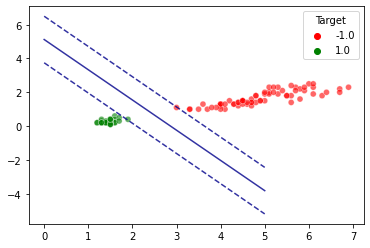

In [45]:
z = np.arange(0,6)
w = model_petal.w

plt.plot(z, -(w[0] + w[1]*z)/w[2], color = "darkblue", alpha = 0.8 )
plt.plot(z, -(w[0] + - 1 + w[1]*z)/w[2], "--", color = "darkblue", alpha = 0.8 )
plt.plot(z, -(w[0] + 1 + w[1]*z)/w[2], "--", color = "darkblue", alpha = 0.8 )

sns.scatterplot(model_petal.x[:,1], model_petal.x[:,2], hue = y_train2, alpha = 0.6, palette = ["red", "green"])

plt.show()

## Stochastic and mini-batch Gradient Descent

We now want to verify the results obtained with stochatic gradient descent and micro-batch gradient descent.  
We set a starting point with which to evaluate the different models without randomness

In [50]:
dummy_weights = [1,1,1,1,1]

The stochastic gradient descent offers a particularly oscillating pattern. Updating the vector $w$ due individually to each point leads to less stable variation, particularly in the values $\|w\|$

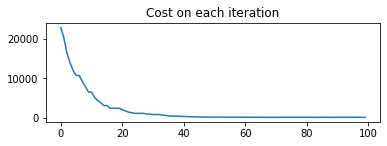

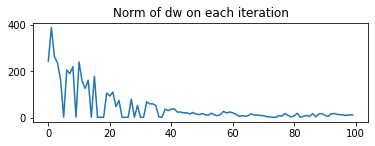

[ 0.74781111 -0.3883707   0.36259742 -0.16135046  0.57041684]


In [51]:
model4 = svm(x_train, y_train, dummy_weights)
print(model4.gradient_descent(nint = 1, batch_size = 1, eta = 0.0005))

Increasing the dimension of the "batch" the descent of the function of cost turns out to be more stable

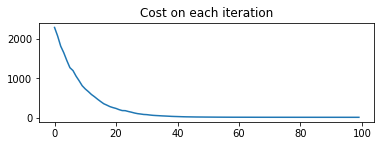

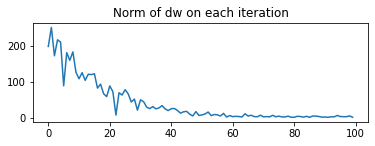

[ 0.74355797 -0.39615285  0.35073778 -0.17015706  0.55686987]


In [52]:
model4 = svm(x_train, y_train, dummy_weights)
print(model4.gradient_descent(nint = 10, batch_size = 10, eta = 0.0005))

With a batch size of half the train set it is possible to achieve a stability comparable to that of the batch gradient descent.

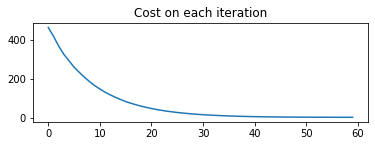

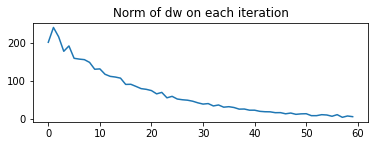

[ 0.75908953 -0.38509189  0.35373675 -0.12320255  0.58962923]


In [53]:
model4 = svm(x_train, y_train, dummy_weights)
print(model4.gradient_descent(nint = 30, batch_size = 50, eta = 0.0005))

Comparing the values of the vector $w$ obtained with the batch gradient descent method we can see that the values tend to be equal 

In [54]:
model4 = svm(x_train, y_train, dummy_weights)
model4.gradient_descent(batch_size = 10, nint = 100, plot = False)
model4.predict(x_test, y_test, accuracy = True, output = False)

Accuracy:  1.0


In [55]:
print(f"SGD: {model4.w}")
print(f"BGD: {model1.w}")

SGD: [ 0.04691296  0.07430214  0.24661098 -0.38848987 -0.17002665]
BGD: [ 0.04634437  0.07194583  0.24325662 -0.38414836 -0.16705861]


## Simulate Annealing 

### Application on Iris dataset

We now apply the search for the minimum of the cost function with the constructed metaheuristic

In [56]:
sim_ann = meta(x_train, y_train)

{'Solution': array([-0.23870495,  0.26075358, -0.14553379, -0.35485763, -0.31089433]),
 'Cost': 0.5050021477459877}

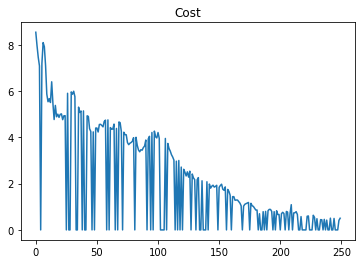

In [57]:
res = sim_ann.sim_ann(T = 20, nint = 250, bound = [-2,2])
res

After a certain number of iterations the reduction of the temperature leads to a probability so reduced to allow shifts closer and closer to the optimal point found

In [58]:
sim_ann.cost()

0.5050021477459877

To verify the goodness of the point found we define a model svm using as initial point the vector just computed and we evaluate the accuracy on the test set

In [59]:
model_sim = svm(x_train, y_train, res["Solution"])

In [60]:
model_sim.predict(x_test, y_test, accuracy = True, output = False)

Accuracy:  0.8


The accuracy result indicates the goodness of the point found. 

It can now be used the gradient descent in order to estimate how much is minimizable ulteriorly the function of cost regarding the simulated annealing

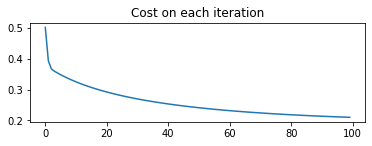

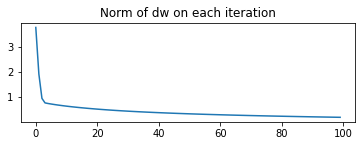

array([-0.04900851,  0.16474681,  0.14698988, -0.40506686, -0.23313845])

In [61]:
model_sim.gradient_descent(nint = 100)

In [62]:
model_sim.predict(x_test, y_test, accuracy = True, output = False)

Accuracy:  1.0


To verify the reduction of the cost of exploits the method `cost`.

In [63]:
meta(x_train, y_train).cost(model_sim.w)

0.20978223580177097

However, the vector values are similar in the two different cases.

In [64]:
print(res["Solution"])
print(model_sim.w)

[-0.23870495  0.26075358 -0.14553379 -0.35485763 -0.31089433]
[-0.04900851  0.16474681  0.14698988 -0.40506686 -0.23313845]
